# import packages & library

In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from IPython.display import display

# Read the data Set 

In [4]:
ds= pd.read_csv('C:/Users/BADAWY/Desktop/DM Project/Cancer Data.csv')

# print Head of the dataset

In [5]:
print("data shape: ", ds.shape ,"\n")
print("data head: \n")
ds.head(15)

data shape:  (1019, 32) 

data head: 



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786.0,M,12.45,15.70,82.57,NaN,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,NaN,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202.0,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981.0,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001.0,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,NaN,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


# see the columns

In [6]:
ds.columns.to_list()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# statistics about data set

In [7]:
ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1.019000e+03,1019.000000,998.000000,1019.000000,981.000000,1019.000000,1019.000000,1019.000000,976.000000,1019.000000,...,1006.000000,973.000000,1002.000000,1019.000000,1019.000000,1019.000000,1019.000000,1002.000000,1019.000000,1019.000000
mean,1.134958e+08,14.785991,19.881177,96.844271,777.633223,0.098207,0.118367,0.111624,0.058665,0.183622,...,17.515045,26.066024,116.401339,1128.661200,0.136123,0.307032,0.339139,0.120658,0.307170,0.092222
std,2.362603e+08,4.248500,5.455030,30.277004,497.721663,0.018991,0.069320,0.102621,0.048107,0.035537,...,6.164100,7.498724,43.453733,891.213157,0.029060,0.223936,0.285793,0.070393,0.092609,0.030161
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.926040e+05,11.760000,16.152500,75.562253,435.600000,0.085110,0.066780,0.032960,0.021660,0.160234,...,13.180000,20.720000,85.090000,538.250000,0.116200,0.154800,0.128600,0.066640,0.250550,0.072530
50%,9.181920e+05,13.680000,18.900000,88.120000,593.700000,0.096561,0.101700,0.077410,0.042447,0.179200,...,15.475000,25.340000,101.200000,749.900000,0.133300,0.233600,0.257300,0.104202,0.284900,0.082030
75%,8.864900e+07,17.295000,22.150000,113.200000,994.000000,0.107550,0.149700,0.164100,0.087565,0.199382,...,20.950000,30.500000,142.183512,1437.000000,0.151300,0.390256,0.464284,0.173075,0.329044,0.100600
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# info about data

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1019 non-null   float64
 1   diagnosis                1019 non-null   object 
 2   radius_mean              1019 non-null   float64
 3   texture_mean             998 non-null    float64
 4   perimeter_mean           1019 non-null   float64
 5   area_mean                981 non-null    float64
 6   smoothness_mean          1019 non-null   float64
 7   compactness_mean         1019 non-null   float64
 8   concavity_mean           1019 non-null   float64
 9   concave points_mean      976 non-null    float64
 10  symmetry_mean            1019 non-null   float64
 11  fractal_dimension_mean   1019 non-null   float64
 12  radius_se                1019 non-null   float64
 13  texture_se               957 non-null    float64
 14  perimeter_se            

# Checks for missing values in each column

In [9]:
ds.isna().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean               21
perimeter_mean              0
area_mean                  38
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean        43
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                 62
perimeter_se                0
area_se                     0
smoothness_se              50
compactness_se              0
concavity_se                0
concave points_se           7
symmetry_se                 4
fractal_dimension_se        4
radius_worst               13
texture_worst              46
perimeter_worst            17
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst       17
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

# show the data types

In [10]:
ds.dtypes

id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# DATA Preprocessing



## Handle Missing Values
### Handle Missing Values fill them with the mean 


In [11]:
ds = ds.fillna(ds.mode().iloc[0])

ds.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Drop columns with NaN values

In [12]:
ds = ds.dropna(axis=1)

# counts for the status column


In [13]:
ds.diagnosis.value_counts()


diagnosis
B    633
M    386
Name: count, dtype: int64

# Handle & Drop rows with any missing variables


## Label Encoding  Label Encoding 

In [14]:
encoder = LabelEncoder()
ds["diagnosis"] = encoder.fit_transform(ds["diagnosis"])
ds.diagnosis.value_counts()


diagnosis
0    633
1    386
Name: count, dtype: int64

# Handle Missing ValuesColumns After Encoding

In [15]:
print(ds.head(15))


            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     842302.0          1        17.99         10.38          122.80   
1     842517.0          1        20.57         17.77          132.90   
2   84300903.0          1        19.69         21.25          130.00   
3   84348301.0          1        11.42         20.38           77.58   
4   84358402.0          1        20.29         14.34          135.10   
5     843786.0          1        12.45         15.70           82.57   
6     844359.0          1        18.25         19.98          119.60   
7   84458202.0          1        13.71         20.83           90.20   
8     844981.0          1        13.00         21.82           87.50   
9   84501001.0          1        12.46         24.04           83.97   
10    845636.0          1        16.02         23.24          102.70   
11  84610002.0          1        15.78         17.89          103.60   
12    846226.0          1        19.17         24.80          13

# Feature Scaling

## Select features & exclude target variable diagnosis

In [16]:
X = ds.drop(columns=['diagnosis'])
y = ds['diagnosis']

# Standardize the features

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 # Splitting the Data 80%  for training & 20% for testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set

In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Model & Make Predictions

In [20]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print actual vs predicted values
print("Actual values:", y_test.values)
print("Predicted values:", y_pred)

# print accuracy score to evaluate the classification
print(f"Accuracy: {accuracy * 100:.2f}%")

Actual values: [0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1]
Predicted values: [0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1]
Accuracy: 87.25%


# Evaluate the Model

In [21]:
# Print actual vs predicted values
print("Actual values: ", y_test.values)
print("Predicted values: ", y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Actual values:  [0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1]
Predicted values:  [0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1]
Accuracy: 87.25%
Confusion Matrix: 
 [[120  10]
 [ 16  58]]


C:\Users\BADAWY\AppData\Local\Temp\ipykernel_13568\234210948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, label='Actual', palette='Blues')
C:\Users\BADAWY\AppData\Local\Temp\ipykernel_13568\234210948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, label='Predicted', palette='Reds', alpha=0.6)


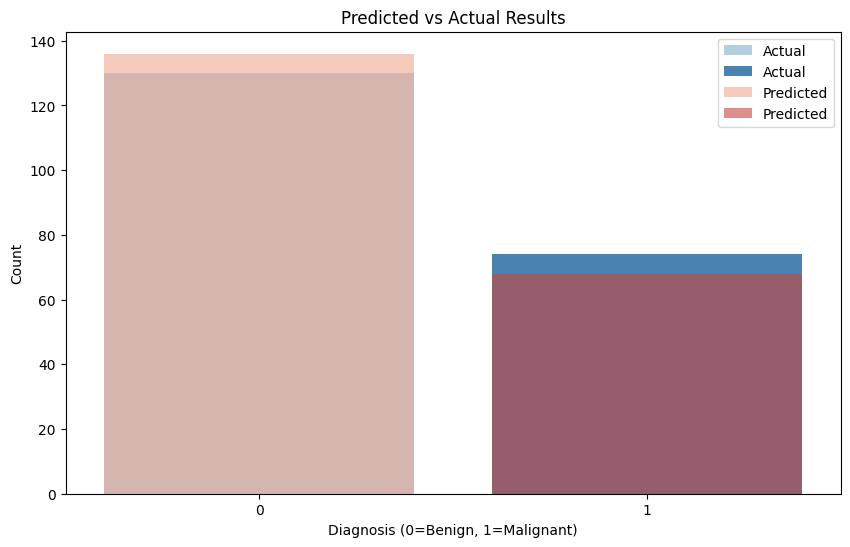

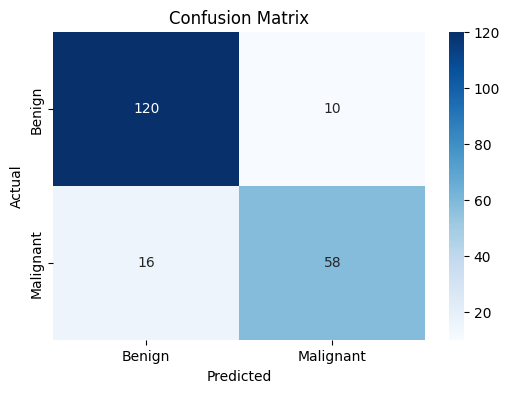

,Actual,Predicted
522,0,0
453,0,0
439,0,0
31,1,0
615,1,1
...,...,...
424,0,0
447,0,0
638,1,0
789,1,0


In [22]:
# Plot the Actual vs Predicted results
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, label='Actual', palette='Blues')
sns.countplot(x=y_pred, label='Predicted', palette='Reds', alpha=0.6)
plt.title('Predicted vs Actual Results')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Display the first few rows of the comparison table
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(comparison_df.head(15))
display(comparison_df)

# Check the data Before & After SMOTE

In [23]:
# Check the class distribution before SMOTE
print("Class distribution before SMOTE (y_train):")
print(pd.Series(y_train).value_counts())

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE (y_train_resampled):")
print(pd.Series(y_train_resampled).value_counts())

# Classification Report after SMOTE
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred))


Class distribution before SMOTE (y_train):
diagnosis
0    503
1    312
Name: count, dtype: int64

Class distribution after SMOTE (y_train_resampled):
diagnosis
0    503
1    503
Name: count, dtype: int64

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       130
           1       0.85      0.78      0.82        74

    accuracy                           0.87       204
   macro avg       0.87      0.85      0.86       204
weighted avg       0.87      0.87      0.87       204



# Predicting a new result

In [ ]:

new_data = [[12.45, 15.70, 82.57, 1001.0, 0.11840, 0.27760, 0.30010, 0.09890, 0.06003, 0.00875, 0.02952, 0.02944, 0.3150, 0.07478, 0.05707, 0.06375, 0.11770, 0.21500, 0.16140, 0.12860, 0.09842, 0.05298, 0.05240, 0.03577, 0.04301, 0.04869, 0.03743, 0.02093, 0.02376, 0.07260, 0.04822]]

# Scaling the new input data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
prediction = model.predict(new_data_scaled)

# Decode the prediction back to original labels (0=Benign, 1=Malignant)
prediction_label = encoder.inverse_transform(prediction)

print(f"The predicted diagnosis is: {'Malignant' if prediction_label == 1 else 'Benign'}")


The predicted diagnosis is: Benign


C:\Users\BADAWY\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
